In [1]:
import pandas as pd
import numpy as np

In [2]:
df_raw = pd.read_csv('../data/raw/airline_passenger_satisfaction.csv')

In [3]:
print(f"Número de filas y columnas: {df_raw.shape}")  # Muestra el número de filas y columnas
df_raw.info()
df_raw.head()

Número de filas y columnas: (103904, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Muestra el número total de duplicados 
print(df_raw.duplicated().sum())

0


In [5]:
df_raw = df_raw.replace("", np.nan)

print(df_raw.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Nos interesa ver la correlacion entre "Arrival Delay in Minutes" y "satisfaction" ya que parece ser que hay bastantes valores nulos en la primera.

Para eso analizaremos primero unas cuantas cosas y tomaremos la decisión adecuada

In [6]:
print(df_raw[['Arrival Delay in Minutes', 'satisfaction']].dtypes)

print(df_raw['Arrival Delay in Minutes'].unique())
print(df_raw['satisfaction'].unique())

Arrival Delay in Minutes    float64
satisfaction                 object
dtype: object
[1.800e+01 6.000e+00 0.000e+00 9.000e+00 2.300e+01 8.000e+00 3.500e+01
 5.100e+01 1.000e+01 5.000e+00 4.000e+00 2.900e+01 4.400e+01 2.800e+01
 1.200e+01 1.200e+02 2.400e+01 1.000e+00 2.000e+01 3.100e+01 1.500e+01
 4.800e+01 2.600e+01 4.900e+01 2.000e+00 3.700e+01 5.000e+01 3.000e+00
 1.900e+01 7.200e+01 1.100e+01 3.400e+01 6.200e+01 2.700e+01 5.200e+01
 1.300e+01 8.200e+01 3.000e+01 1.600e+01 7.000e+00 1.220e+02 1.790e+02
 1.250e+02 1.700e+01       nan 8.900e+01 1.010e+02 1.400e+01 6.100e+01
 3.200e+01 3.300e+01 4.100e+01 1.910e+02 1.380e+02 5.300e+01 2.200e+01
 5.700e+01 6.500e+01 7.600e+01 1.070e+02 9.200e+01 1.640e+02 2.100e+01
 4.000e+01 5.500e+01 1.850e+02 6.300e+01 7.700e+01 8.600e+01 9.100e+01
 1.000e+02 5.400e+01 3.600e+01 7.000e+01 1.390e+02 6.700e+01 1.630e+02
 1.280e+02 1.800e+02 9.300e+01 1.210e+02 4.500e+01 1.050e+02 1.260e+02
 5.600e+01 7.300e+01 2.120e+02 8.800e+01 2.410e+02 1.720e+02 1

## Observaciones

### Tipos de Datos

"Arrival Delay in Minutes": float64 – Esta columna contiene valores numéricos y parece estar bien definida.

"satisfaction": object – Esta columna contiene categorías textuales, específicamente 'neutral or dissatisfied' y 'satisfied'.

### Valores Únicos
"Arrival Delay in Minutes": Contiene una amplia gama de valores numéricos, incluidos algunos valores extremadamente altos (como 1584 minutos). También tiene valores NaN (vacíos).

"satisfaction": Contiene dos categorías:

'neutral or dissatisfied'
'satisfied'

### Problemas Identificados

+ **Valores NaN** en "Arrival Delay in Minutes":

    Estos valores NaN deben ser manejados. La columna "satisfaction" contiene valores categóricos que deben ser convertidos en valores numéricos para el análisis cuantitativo, como calcular la correlación.


+ **Datos Categóricos** en "satisfaction":

    La columna "satisfaction" contiene valores categóricos que deben ser convertidos en valores numéricos para el análisis cuantitativo, como calcular la correlación.

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_raw['satisfaction'] = label_encoder.fit_transform(df_raw['satisfaction'])
df_raw['Gender'] = label_encoder.fit_transform(df_raw['Gender'])
df_raw['Customer Type'] = label_encoder.fit_transform(df_raw['Customer Type'])
df_raw['Type of Travel'] = label_encoder.fit_transform(df_raw['Type of Travel'])
df_raw['Class'] = label_encoder.fit_transform(df_raw['Class'])


Esto convertirá 'neutral or dissatisfied' en 0 y 'satisfied' en 1, pra poder ver la correlación.

Y el resto de variables categoricas en numericas.

In [8]:
# Mostrar las primeras filas del DataFrame para verificar el cambio
df_raw.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [9]:
# Eliminar las columnas 'Unnamed: 0' e 'id'
df_raw.drop(columns=['Unnamed: 0', 'id'], inplace=True)


Eliminamos las columnas que no arrojarán datos en nuestro EDA

In [10]:
print(df_raw.describe())

              Gender  Customer Type            Age  Type of Travel  \
count  103904.000000  103904.000000  103904.000000   103904.000000   
mean        0.492541       0.182678      39.379706        0.310373   
std         0.499947       0.386404      15.114964        0.462649   
min         0.000000       0.000000       7.000000        0.000000   
25%         0.000000       0.000000      27.000000        0.000000   
50%         0.000000       0.000000      40.000000        0.000000   
75%         1.000000       0.000000      51.000000        1.000000   
max         1.000000       1.000000      85.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean        0.594135      1189.448375               2.729683   
std         0.620799       997.147281               1.327829   
min         0.000000        31.000000               0.000000   
25%         0.000000       414.000000            

In [11]:
correlation = df_raw[['Arrival Delay in Minutes', 'satisfaction']].corr()
print(correlation)

                          Arrival Delay in Minutes  satisfaction
Arrival Delay in Minutes                  1.000000     -0.057582
satisfaction                             -0.057582      1.000000


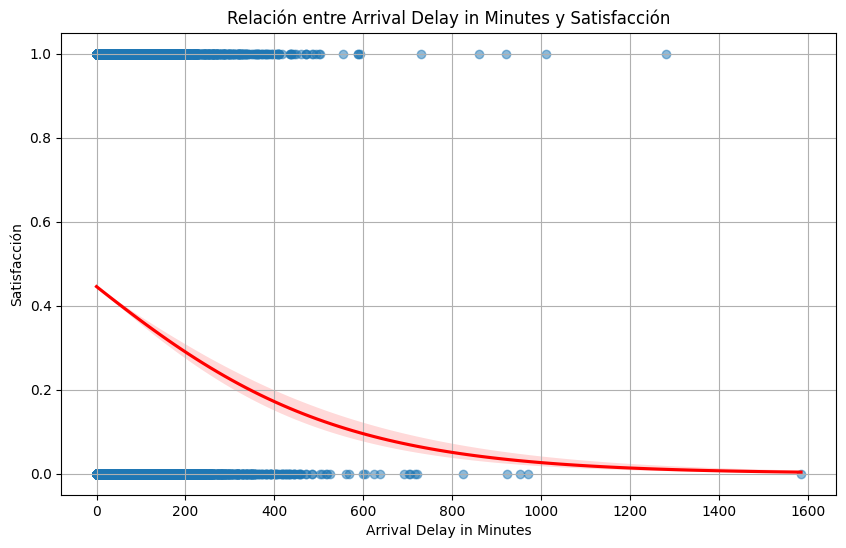

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='Arrival Delay in Minutes', y='satisfaction', data=df_raw, logistic=True, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Relación entre Arrival Delay in Minutes y Satisfacción')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Satisfacción')
plt.grid(True)
plt.show()


En este gráfico, podemos ver una línea de regresión logística ajustada (en rojo), que muestra la relación entre el retraso en la llegada y la satisfacción. 

La forma descendente de la curva indica que, a medida que aumenta el retraso en minutos, la probabilidad de que los pasajeros estén satisfechos disminuye de manera significativa. 

Esto refleja una correlación negativa entre estas dos variables,

### Análisis:

+ ***Forma de la Curva:*** La curva tiene una forma característica de regresión logística, donde el descenso es más pronunciado al principio y luego se aplana. Esto significa que, para retrasos pequeños, la satisfacción disminuye rápidamente, pero a partir de cierto punto, incluso grandes aumentos en el retraso no parecen reducir tanto la satisfacción (probablemente porque ya es extremadamente baja).

+ ***Intervalo de Confianza:*** El área sombreada alrededor de la línea roja representa el intervalo de confianza. Esto indica la incertidumbre en la estimación de la regresión logística, y puedes ver que la predicción se vuelve más incierta para los valores más extremos de retraso.

Este gráfico es útil para visualizar el impacto del retraso en la llegada sobre la satisfacción de los pasajeros y cómo esta relación no es lineal, sino que sigue una tendencia logística.

In [13]:
#Imputar valores NaN en 'Arrival Delay in Minutes' con la mediana
median_delay = df_raw['Arrival Delay in Minutes'].median()
df_raw.fillna({'Arrival Delay in Minutes': median_delay}, inplace=True)

Imputar los valores faltantes (NaN) con la mediana es una opción sólida en este caso por varias razones:

1. **Robustez frente a valores atípicos (outliers)**:

    Distribución de los datos: La columna "Arrival Delay in Minutes" muestra una amplia gama de valores, con algunos extremadamente altos (por ejemplo, 1584 minutos). Estos valores altos podrían ser outliers, lo que significa que no representan la tendencia general de la mayoría de los datos.
    
    La mediana es menos sensible a los outliers que la media. Si imputas los valores NaN con la media y tienes outliers muy grandes, la media puede ser arrastrada hacia valores más altos, lo que distorsionaría la imputación. La mediana, al ser el valor central de la distribución, no se ve afectada por estos valores extremos y proporciona una estimación más representativa del comportamiento típico de los datos.

2. **Distribución Sesgada**:

    Si los datos están sesgados (es decir, no tienen una distribución simétrica), la mediana es una mejor medida de tendencia central. La columna "Arrival Delay in Minutes" probablemente tiene una distribución sesgada hacia la derecha (con más valores bajos y algunos valores extremadamente altos). En este tipo de distribuciones, la mediana refleja mejor el "centro" de los datos que la media, que podría verse sesgada hacia los valores altos.

3. **Simplicidad y Eficacia**:

    Imputar con la mediana es una solución simple que no requiere suposiciones fuertes sobre la distribución de los datos o el ajuste de un modelo más complejo para estimar los valores faltantes.

    Es una estrategia eficaz que conserva la estructura general de los datos sin introducir sesgos significativos derivados de los valores extremos.

4. **Preservación de la varianza**:

    Imputar con la mediana ayuda a preservar la varianza en los datos. Si imputaras con la media, especialmente en presencia de outliers, podrías estar introduciendo un sesgo hacia valores más altos, lo que reduciría la varianza y, potencialmente, la precisión de un modelo predictivo.

Inflight wifi service
0     3103
1    17840
2    25830
3    25868
4    19794
5    11469
Name: count, dtype: int64


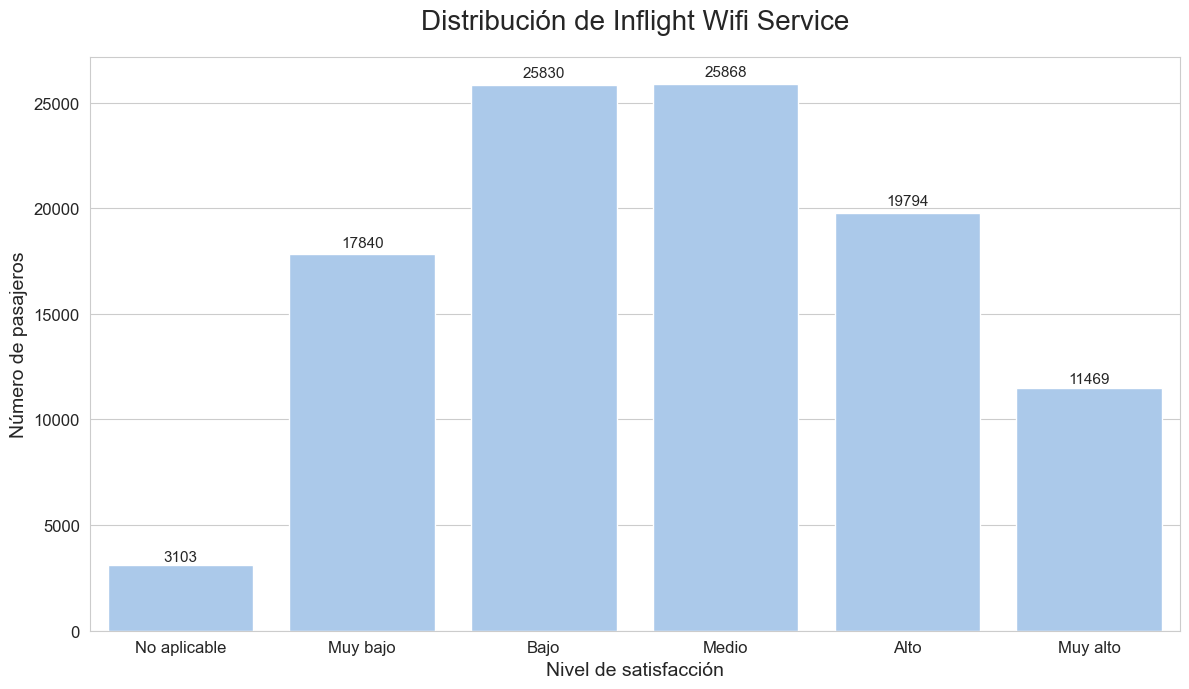

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


# Asumiendo que df_raw es tu DataFrame
# Contar el número de ocurrencias de cada valor en la columna 'Inflight wifi service'
counts = df_raw['Inflight wifi service'].value_counts().sort_index()

# Mostrar los resultados
print(counts)


# Asumiendo que df_raw es tu DataFrame
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de barras
ax = sns.barplot(x=df_raw['Inflight wifi service'].value_counts().index, 
                 y=df_raw['Inflight wifi service'].value_counts().values,
                 order=range(6))

# Personalizar el gráfico
plt.title('Distribución de Inflight Wifi Service', fontsize=20, pad=20)
plt.xlabel('Nivel de satisfacción', fontsize=14)
plt.ylabel('Número de pasajeros', fontsize=14)
plt.xticks(range(6), ['No aplicable', 'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'], fontsize=12)
plt.yticks(fontsize=12)

# Añadir valores en la parte superior de cada barra usando `ax.patches`
for bar in ax.patches:
    height = bar.get_height()
    # Añadir el texto en la parte superior de cada barra
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01 * height,
            f'{int(height)}', ha='center', va='bottom', fontsize=11)

# Ajustar los márgenes
plt.tight_layout()

plt.show()


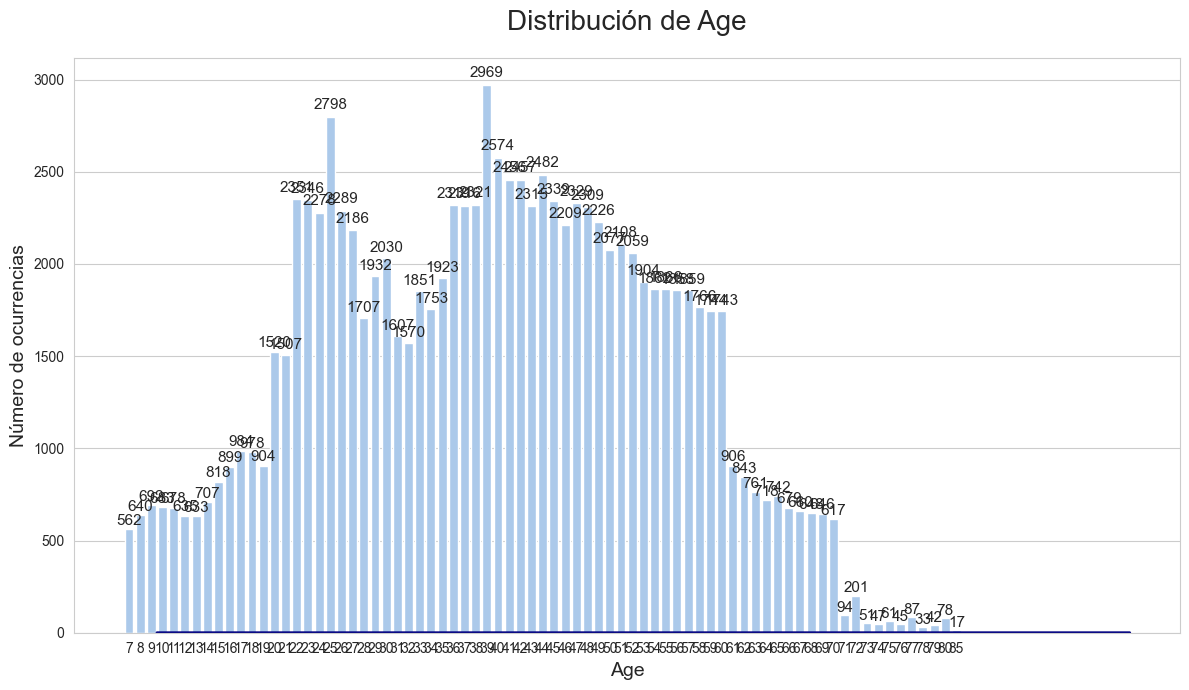

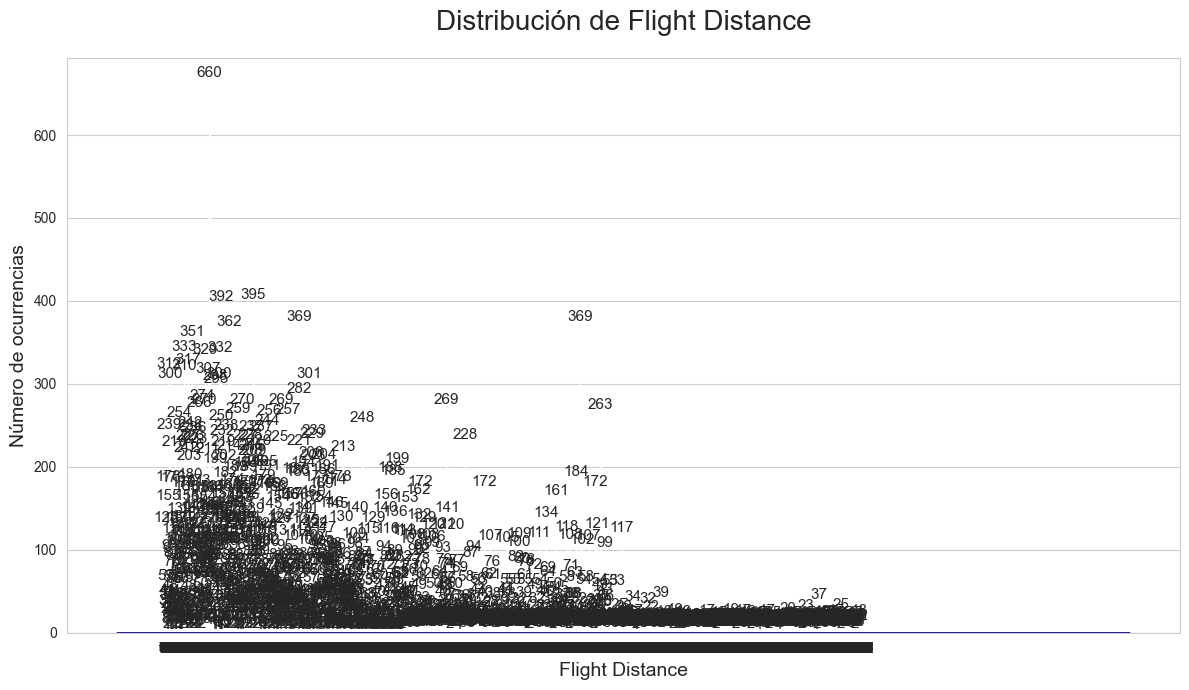

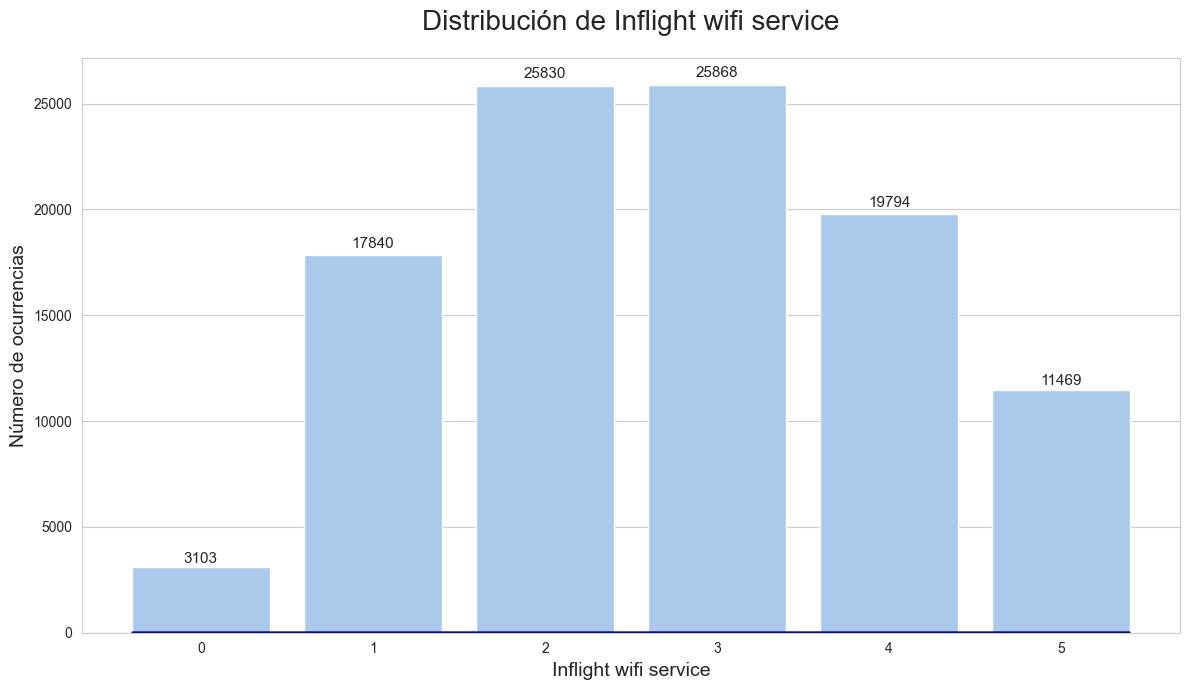

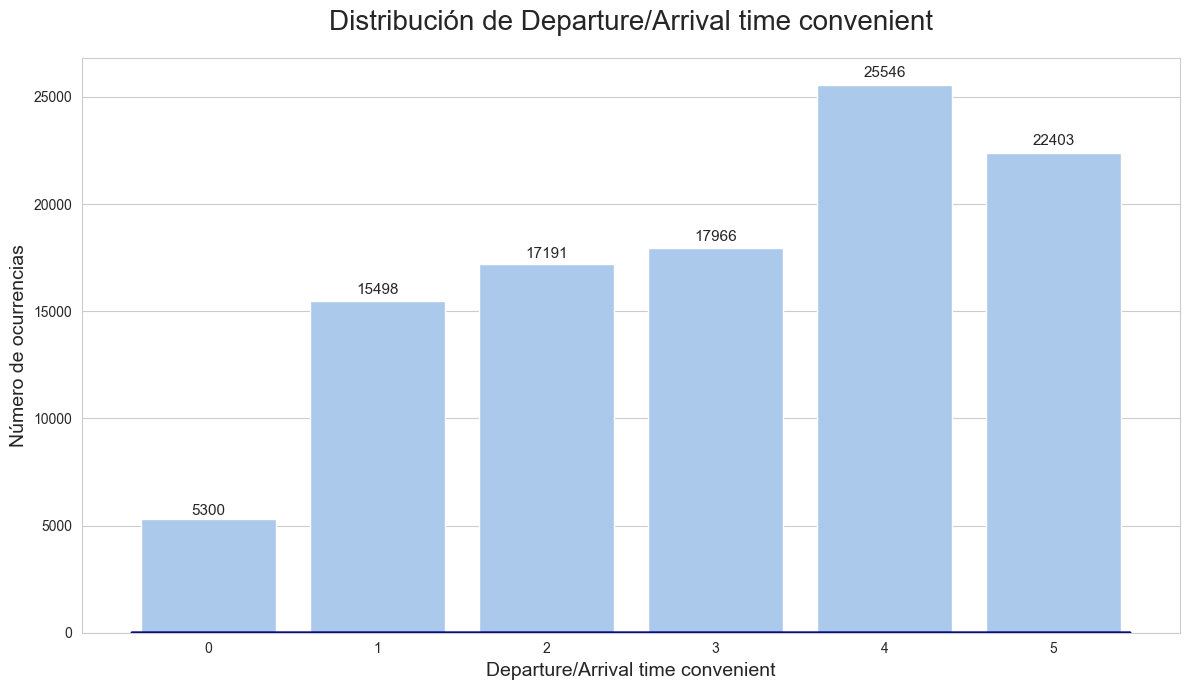

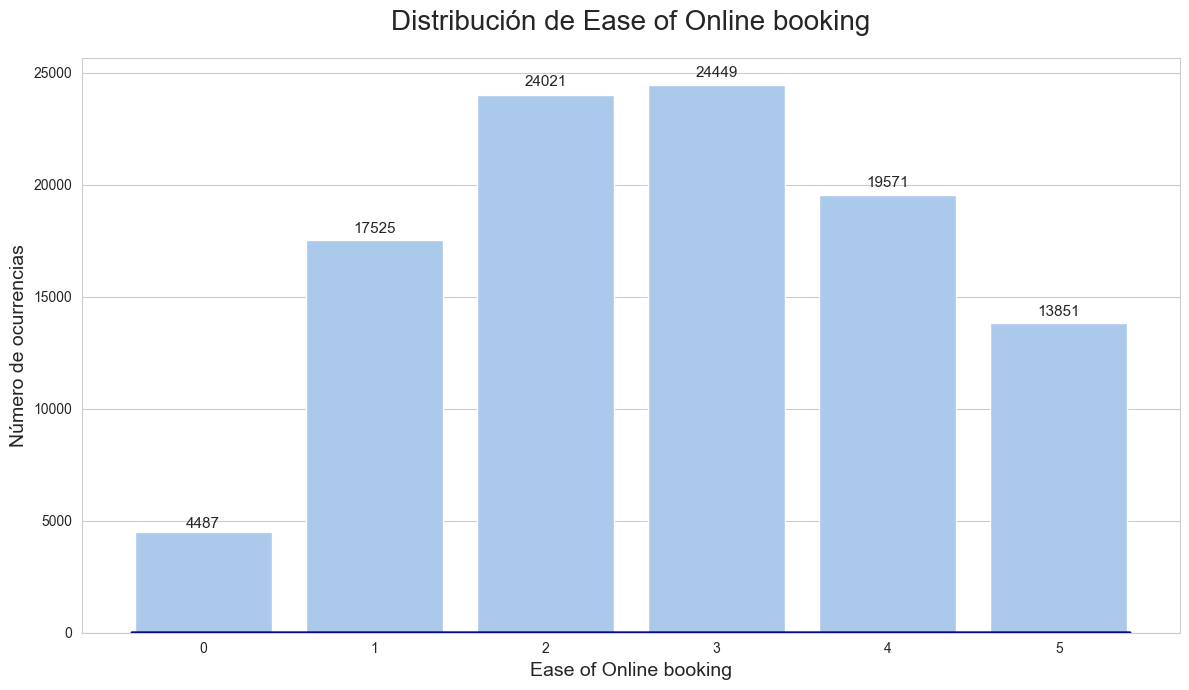

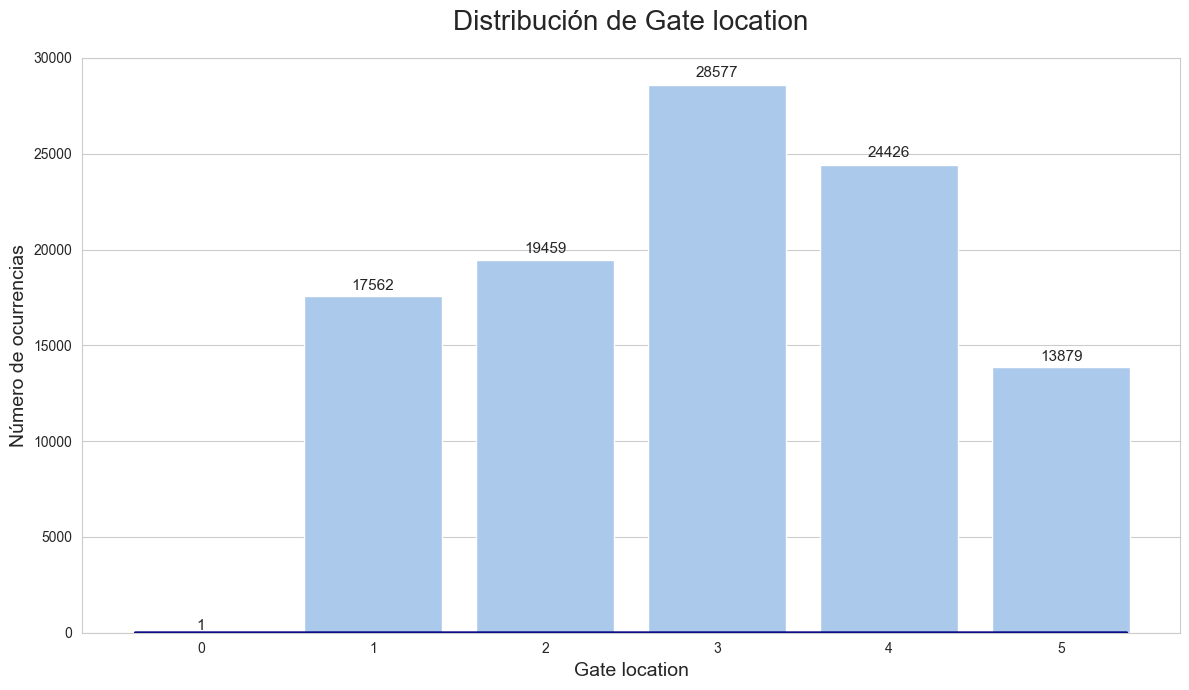

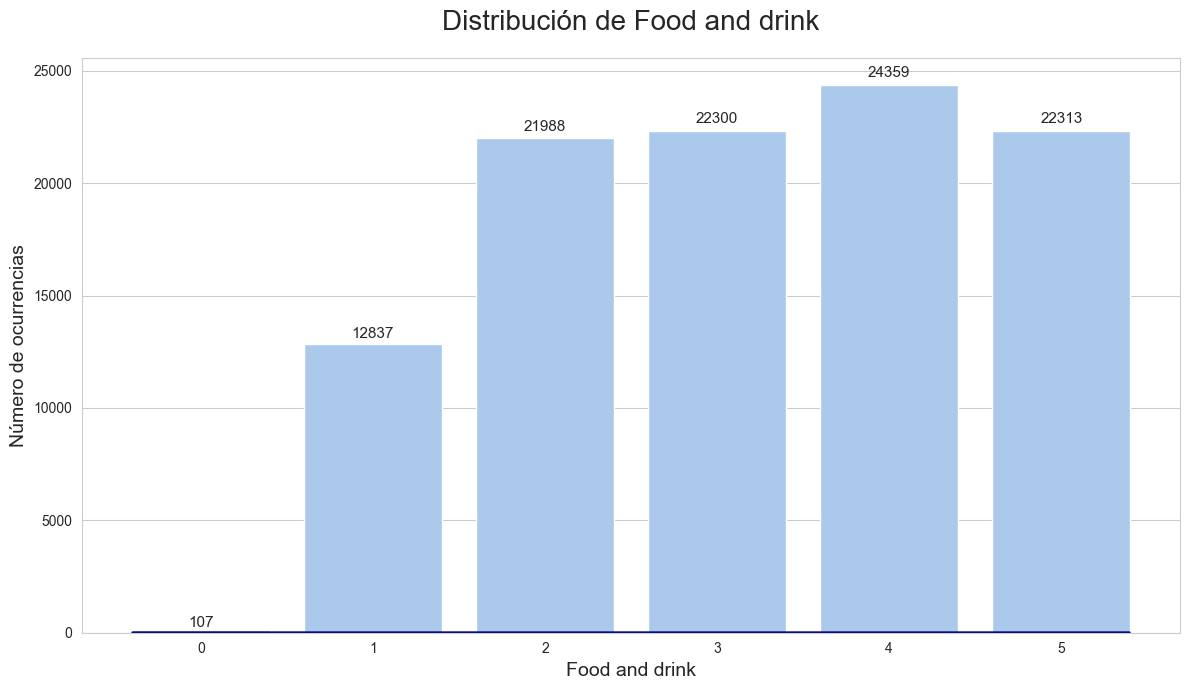

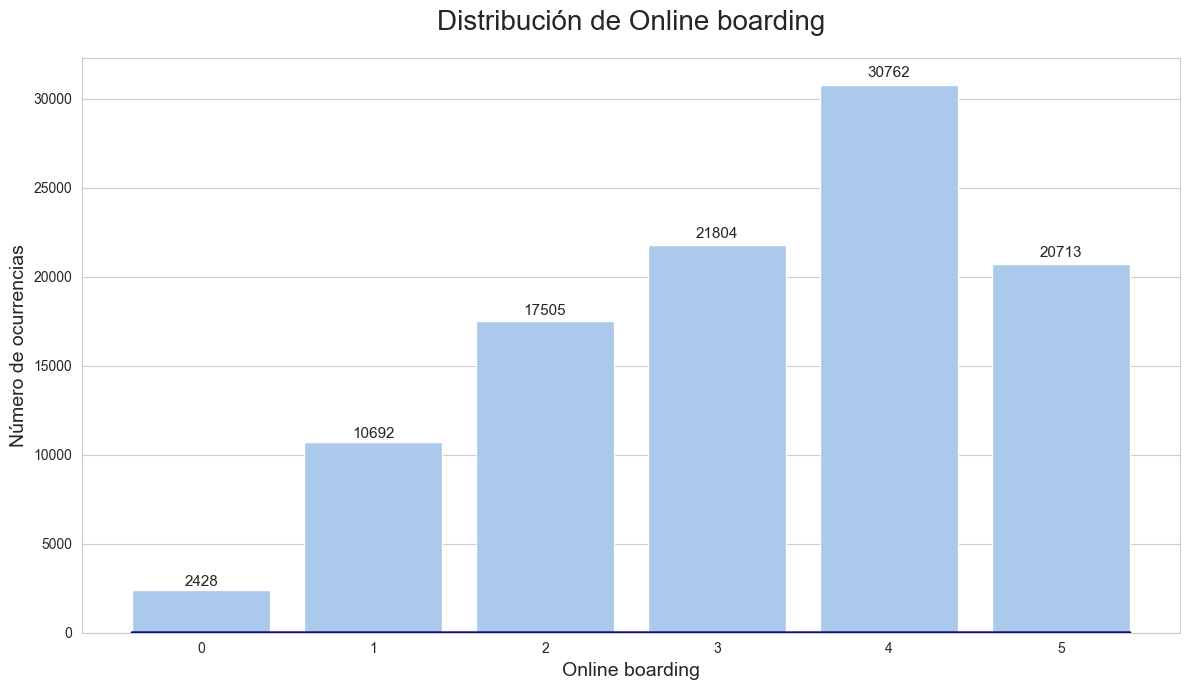

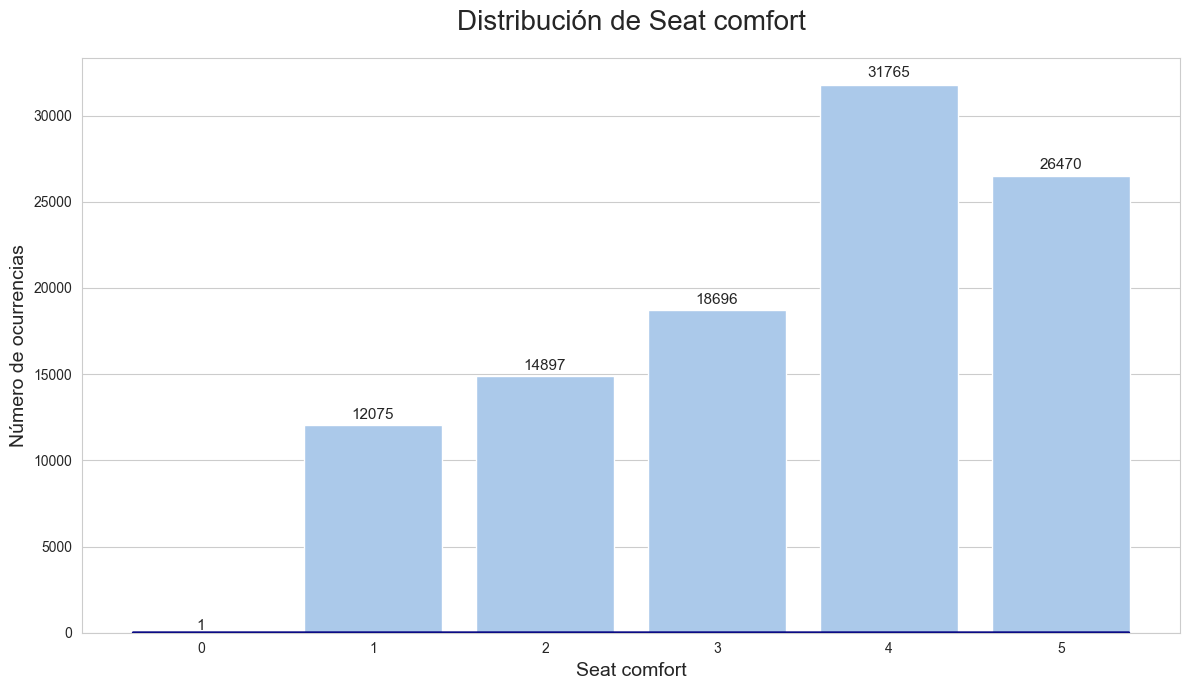

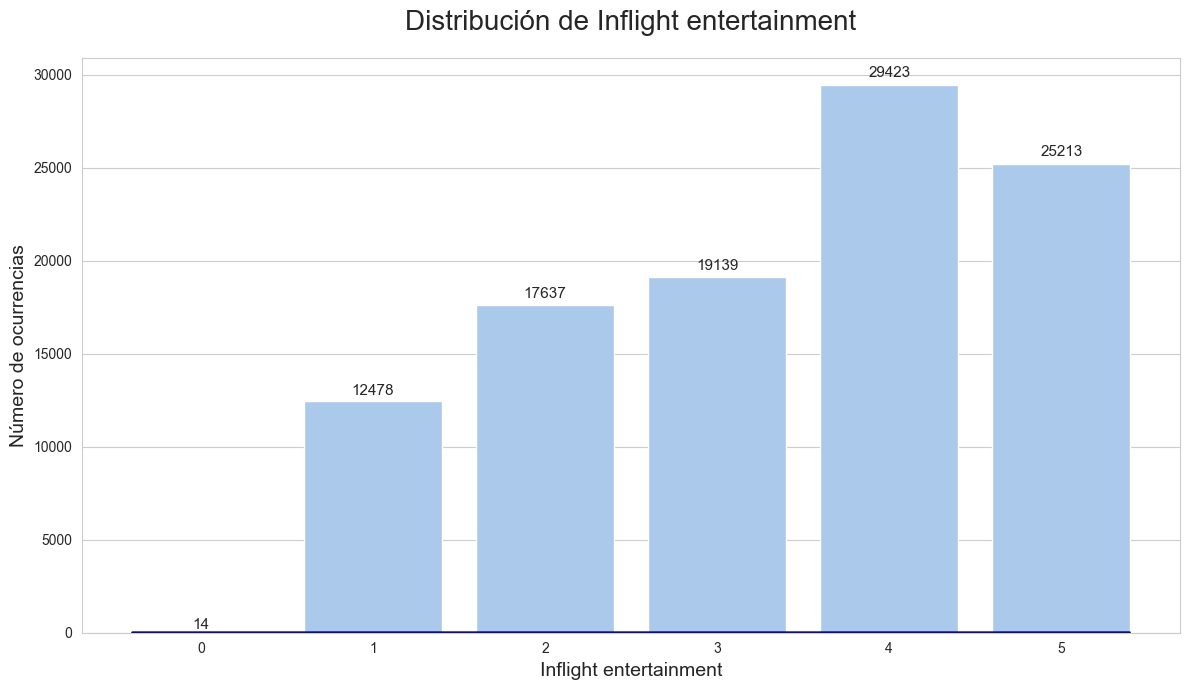

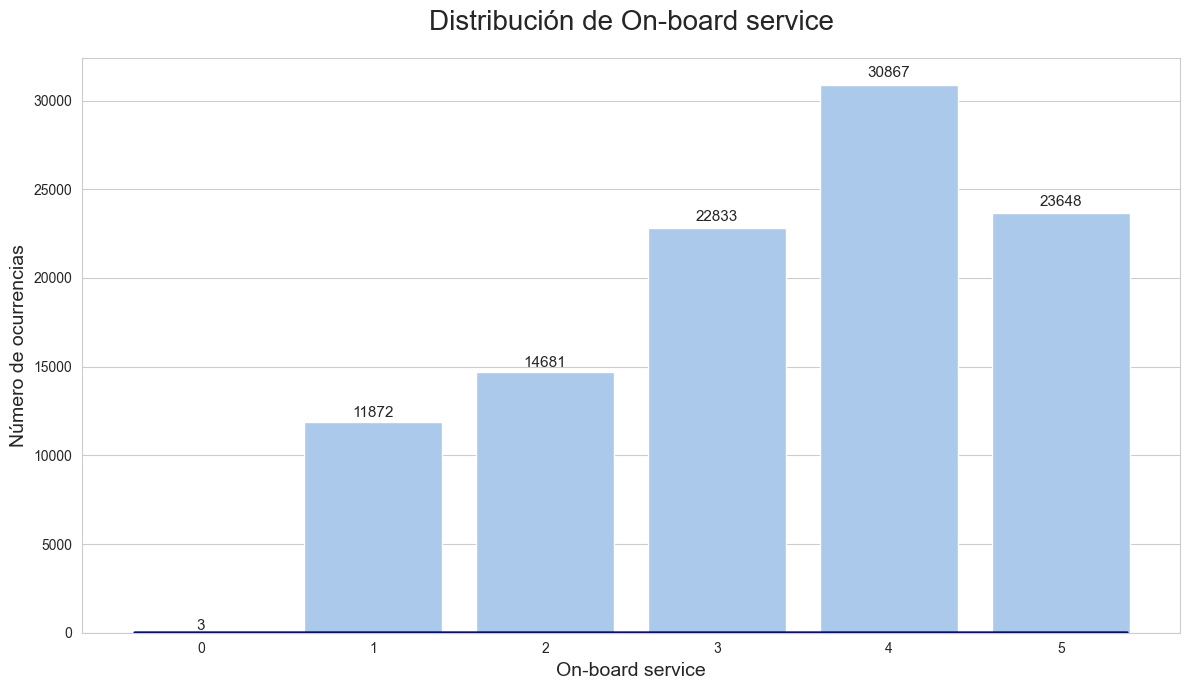

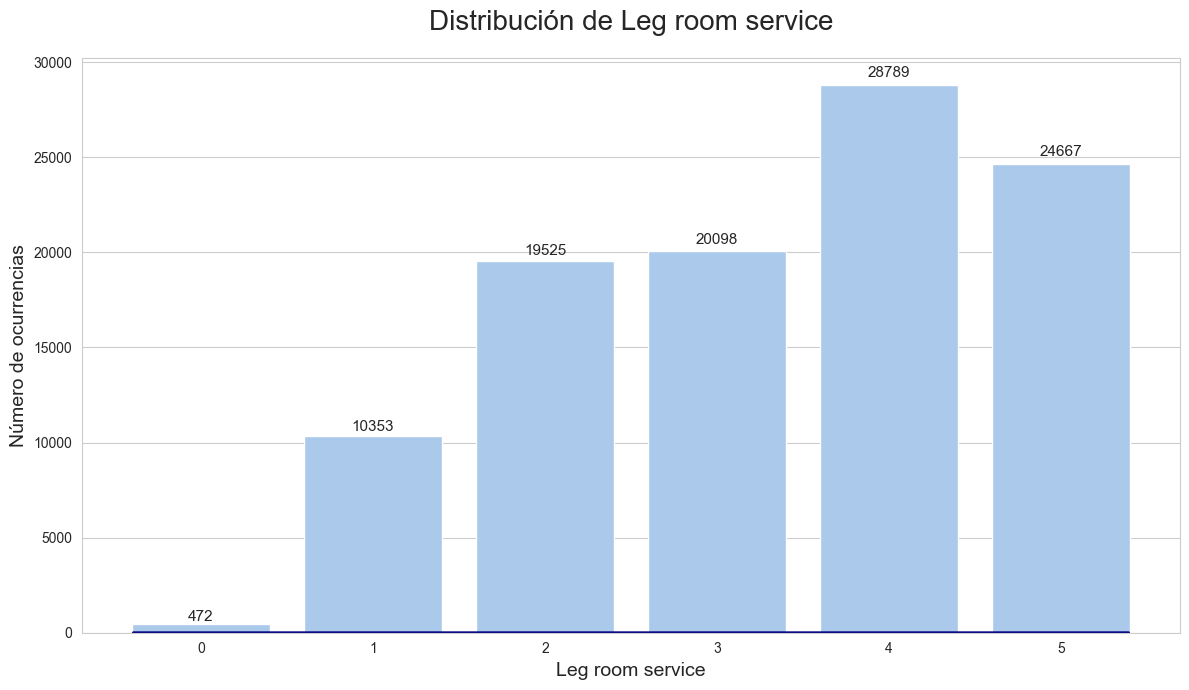

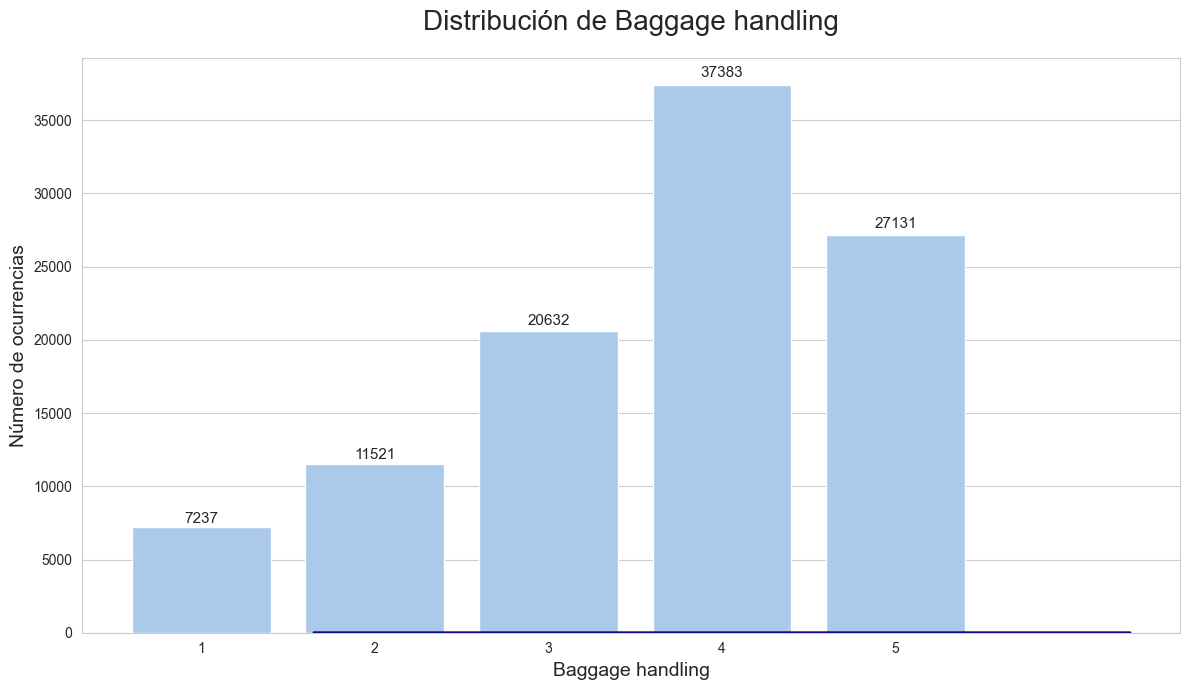

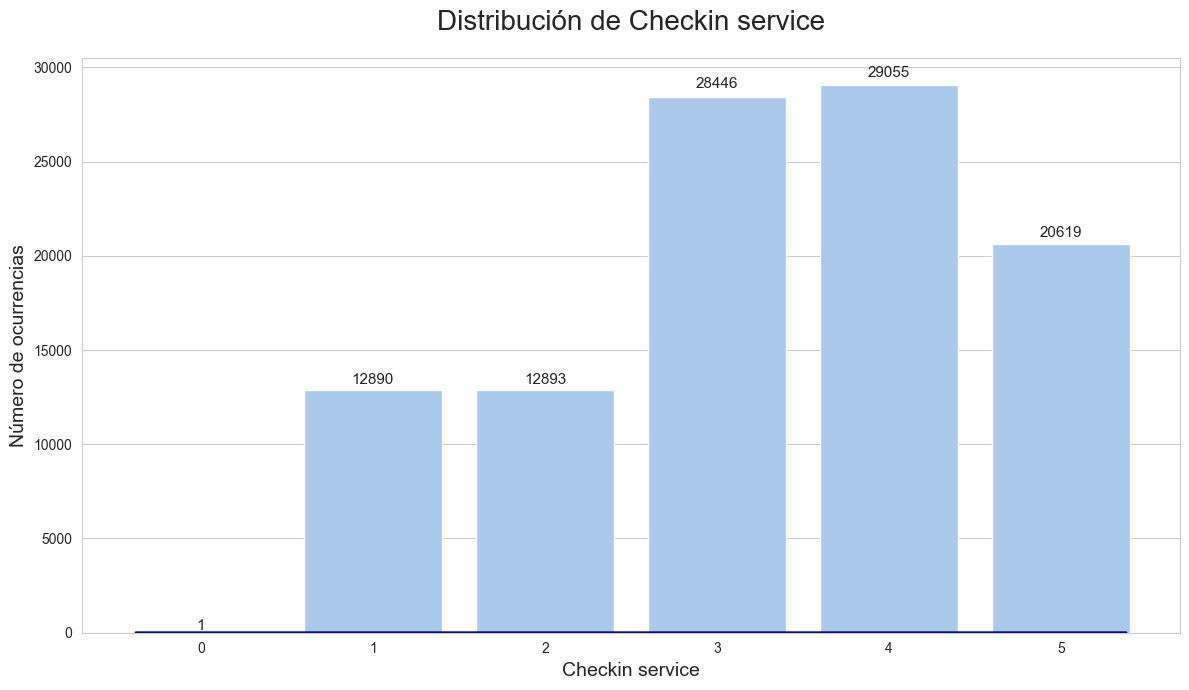

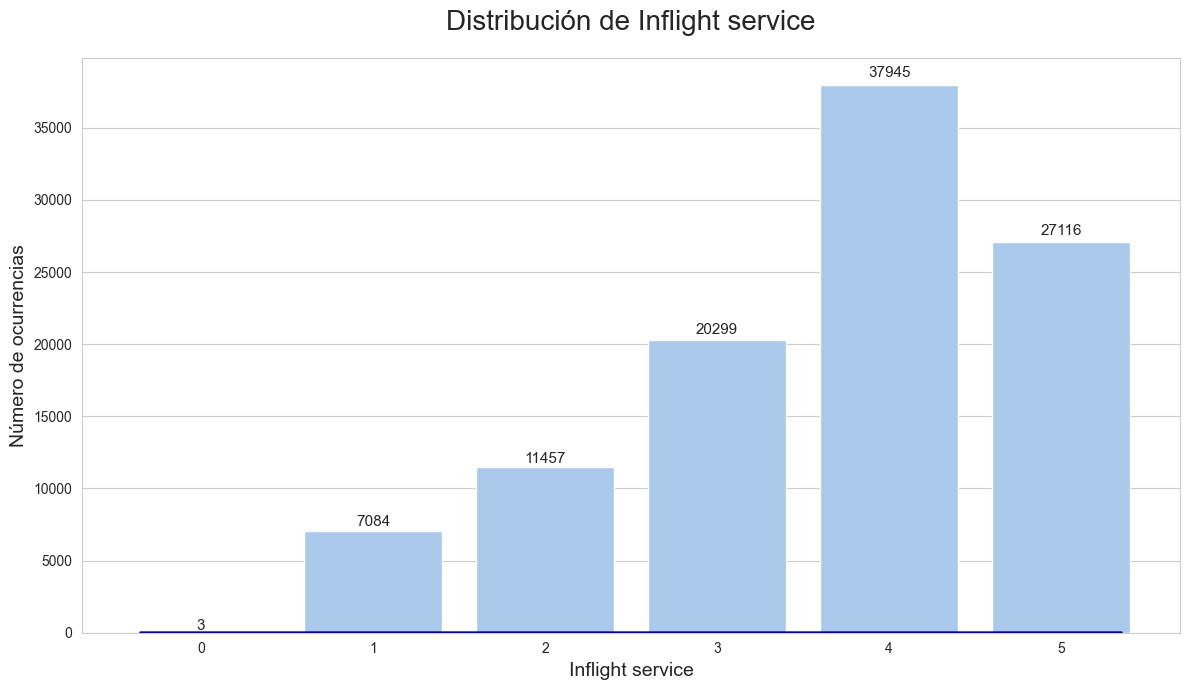

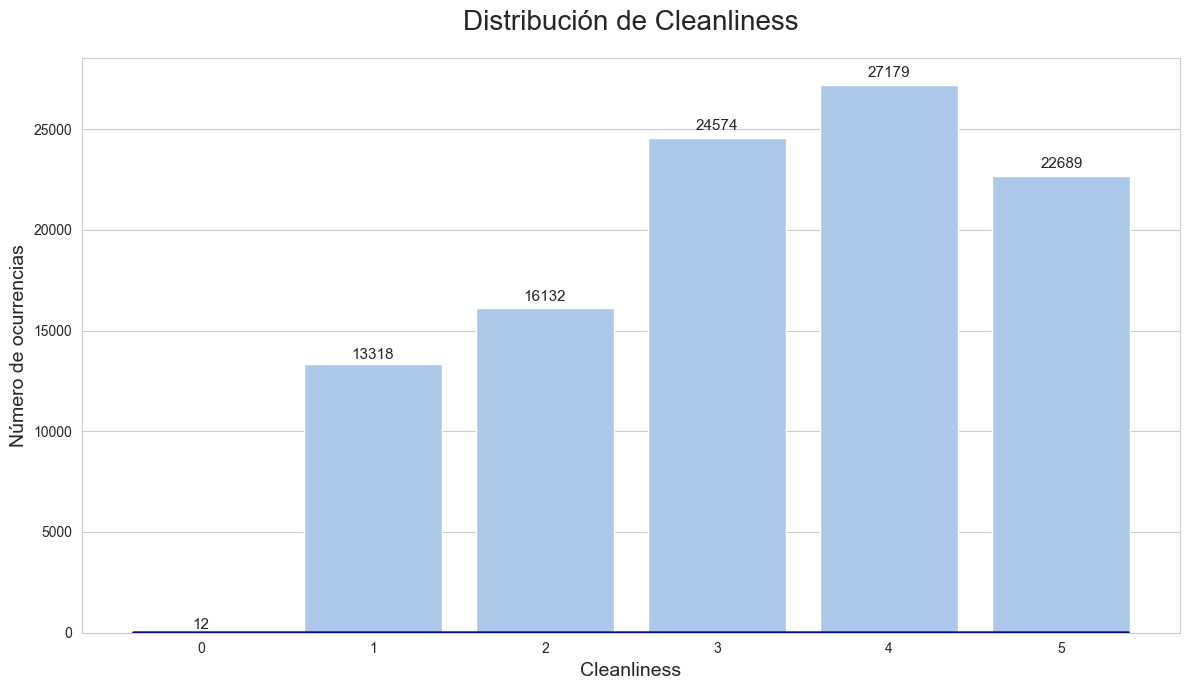

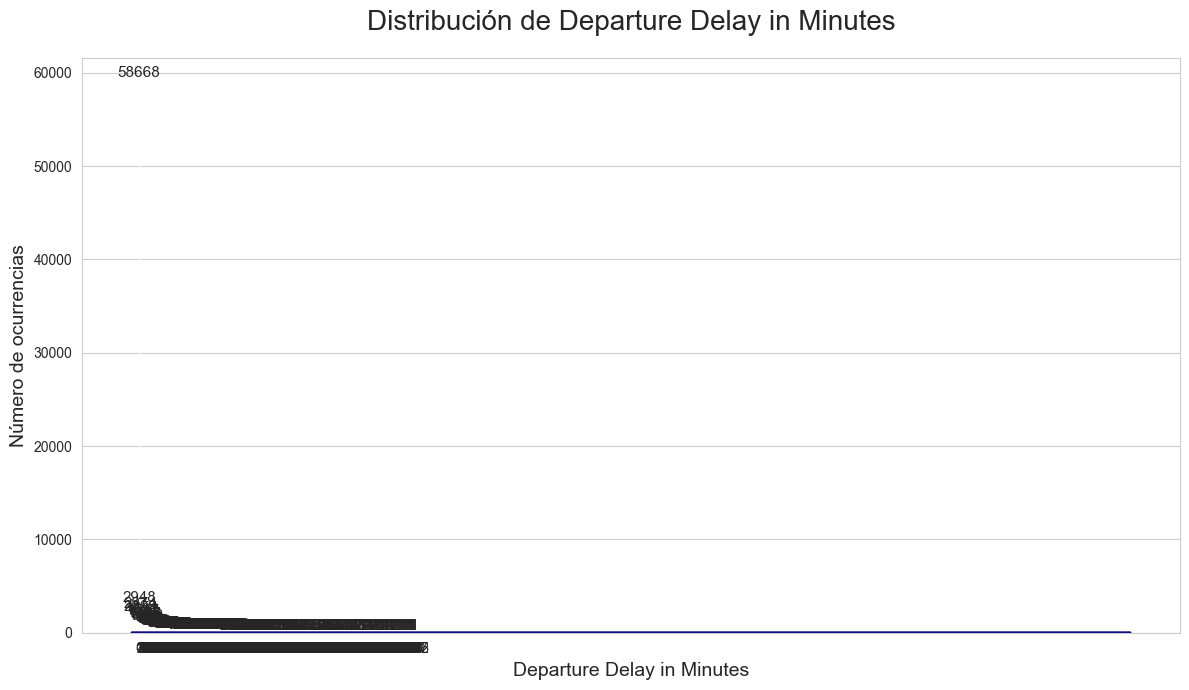

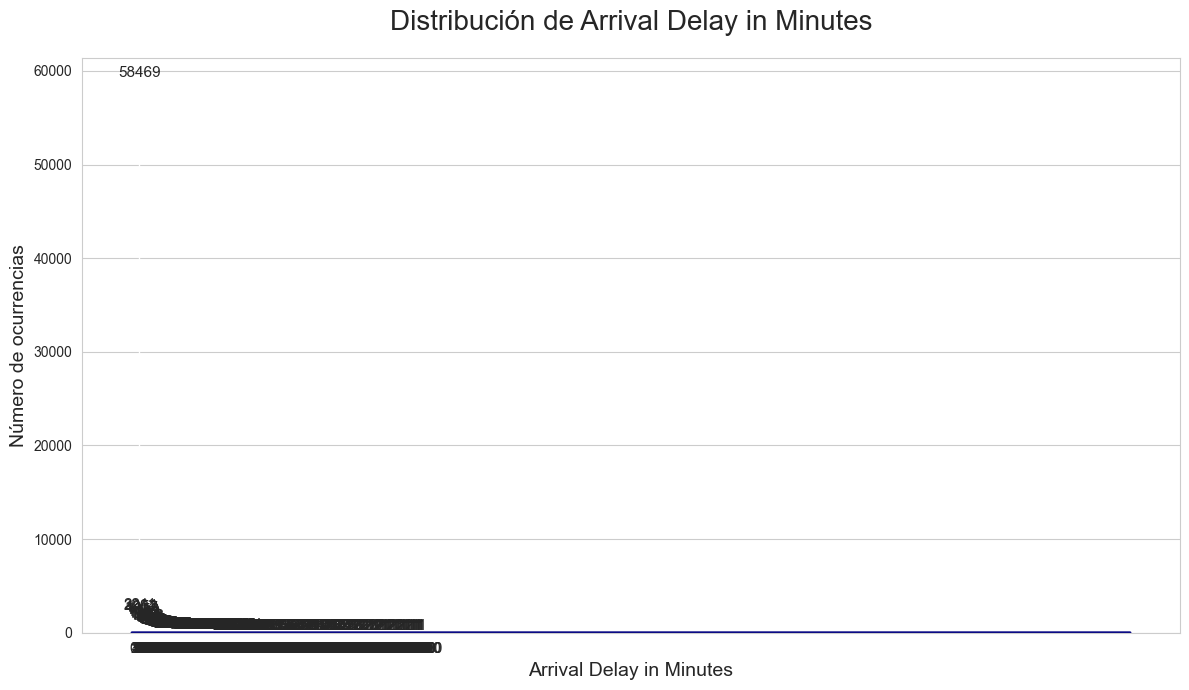

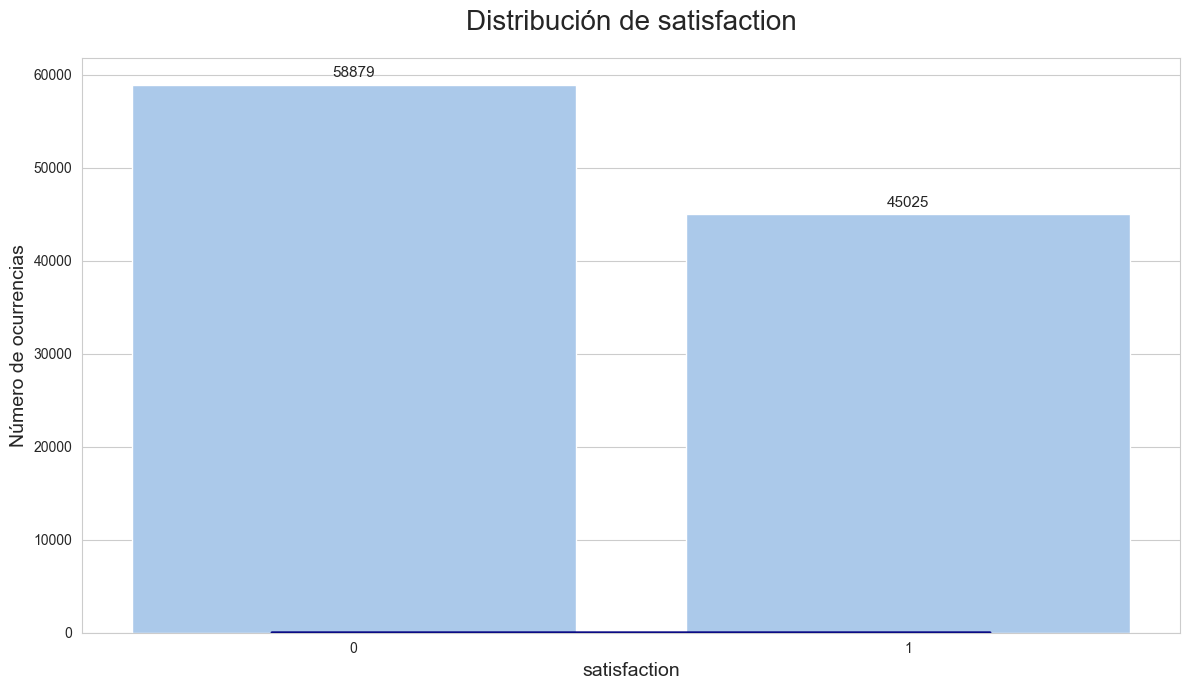

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que df_raw es tu DataFrame
# Seleccionar columnas numéricas
numeric_columns = df_raw.select_dtypes(include='number').columns

# Configuración de estilo y paleta
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Iterar sobre cada columna numérica
for col in numeric_columns:
    plt.figure(figsize=(12, 7))
    
    # Crear el gráfico de barras
    ax = sns.barplot(x=df_raw[col].value_counts().index,
                     y=df_raw[col].value_counts().values,
                     order=sorted(df_raw[col].value_counts().index))
    
    # Añadir la curva KDE
    sns.kdeplot(data=df_raw[col], color='navy', linewidth=2)
    
    # Personalizar el gráfico
    plt.title(f'Distribución de {col}', fontsize=20, pad=20)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Número de ocurrencias', fontsize=14)
    
    # Añadir valores en la parte superior de cada barra
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01 * height,
                f'{int(height)}', ha='center', va='bottom', fontsize=11)
    
    # Ajustar los márgenes
    plt.tight_layout()
    plt.show()


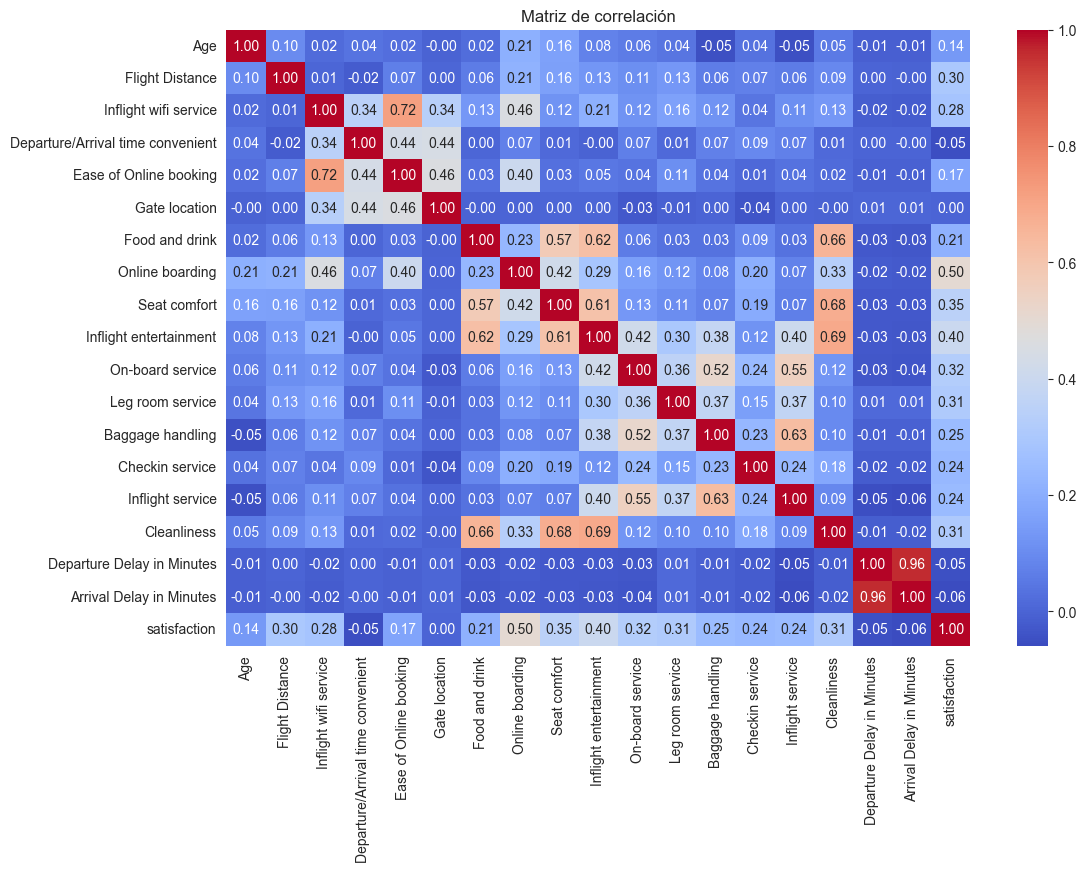

In [26]:
#Análisis de correlaciones en columnas numéricas
numerical_columns_only = df_raw.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
correlation_matrix = df_raw[numerical_columns_only].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

# Guardamos el dataset procesado

In [ ]:
# Guardar el DataFrame en un archivo CSV
df_raw.to_csv('../data/processed/processed_dataset.csv', index=False)
